In [ ]:
import clfdata
%matplotlib inline
from clfdata import test_knn
from clfdata import predict_family_knn
from clfdata import test_svm
from clfdata import predict_family_svm
from clfdata import test_lda
from clfdata import predict_family_svm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from database import Database
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## test

In [4]:
test_knn()

k = 5
Accuracy = 0.974137931034


0.97413793103448276

In [5]:
test_svm()

Accuracy =  0.98275862069


0.98275862068965514

In [6]:
test_lda()

Accuracy =  0.974137931034


C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.97413793103448276

## Prediction

In [8]:
from clfdata import data_clean
X_train, y_train, X_test, y_test = data_clean()
X=X_train.iloc[0:1,:]
X

,[H],[CX4H3],[CX4H2],[CX4H1],[CX4H0],[CX3H2],[CX3H1],[CX3H0],[CX2H1],[CX2H0],...,[OX2H1][cX3]:[c],[OX2H0],[OX2H0R],[oX2H0](:*):*,[CX3H0]=[O],[CX3H0R]=[O],[CX3H1]=[O],[CX3H0](=[O])[OX2H1],[CX3H0](=[O])[OX2H0],[cX3H0](:*)(:*):*
351,1,1,1,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [9]:
predict_family_knn(X)

array(['Esters'], dtype=object)

In [10]:
predict_family_lda(X)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array(['Esters'],
      dtype='<U22')

In [11]:
y_pred = predict_family_svm(X)

## plot

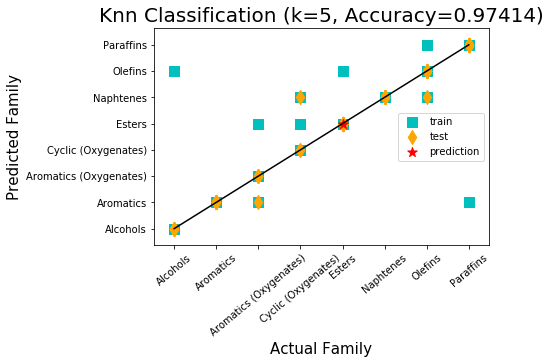

In [12]:
plot_knn(y_pred)

C:\Users\sxzxc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


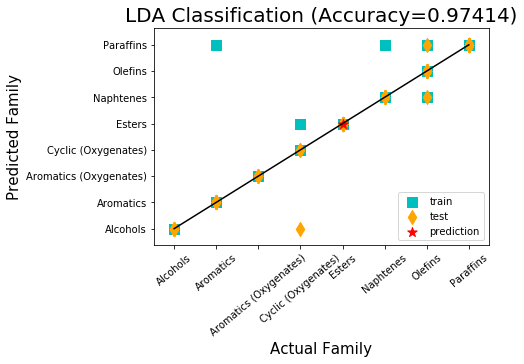

In [15]:
plot_lda(y_pred)

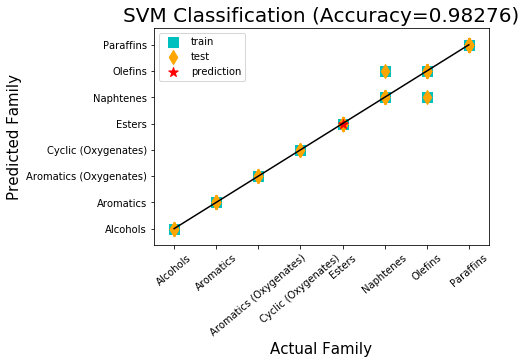

In [18]:
plot_svm(y_pred)

## define

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from database import Database
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def data_clean():
    """split data and generate train & test subset"""
    df = Database()
    train, test = train_test_split(df, test_size=0.1, random_state=2)
    a = train.loc[:,'[H]': '[cX3H0](:*)(:*):*']
    X_train = a.mask(a>0, 1)
    y_train = train['Family']

    b = test.loc[:,'[H]': '[cX3H0](:*)(:*):*']
    X_test = b.mask(b>0, 1)
    y_test = test['Family']
    return X_train, y_train, X_test, y_test

def train_knn(k, X_train, y_train):
    """use knn method to train data"""
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

def test_knn():
    """plot train and test classification result"""
    X_train, y_train, X_test, y_test = data_clean()
    k = 5
    knn = train_knn(k, X_train, y_train)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    acc = metrics.accuracy_score(y_test, test_pred)
    print('k =', k)
    print('Accuracy =', acc)
    return acc
    

def predict_family_knn(X):
    """predit family of import molecule X"""
    X_train, y_train, X_test, y_test = data_clean()
    k = 5
    knn = train_knn(k, X_train, y_train)
    y_pred = knn.predict(X)
    return y_pred

def plot_knn(y_pred):
    X_train, y_train, X_test, y_test = data_clean()
    k = 5
    knn = train_knn(k, X_train, y_train)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    acc = metrics.accuracy_score(y_test, test_pred)
    ax = plt.figure()
    plt.plot([0,7], [0,7], color='k')
    plt.scatter(y_train, train_pred, marker='s', s=100,c='c', label='train')
    plt.scatter(y_test, test_pred, marker='d', s=100, c='orange', label='test')
    plt.scatter(y_pred, y_pred, marker='*', s=100, c='r', label='prediction')
    plt.xticks(rotation='40')
    plt.xlabel('Actual Family', fontsize=15)
    plt.ylabel('Predicted Family', fontsize=15)
    plt.title('Knn Classification (k=%d, Accuracy=%.5f)' % (k, acc),fontsize=20)
    plt.legend()
    return ax

def train_lda(X_train, y_train):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    return lda

def test_lda():
    X_train, y_train, X_test, y_test = data_clean()
    lda = train_lda(X_train, y_train)
    test_pred = lda.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    print('Accuracy = ', acc)
    return acc

def predict_family_lda(X):
    X_train, y_train, X_test, y_test = data_clean()
    lda = train_lda(X_train, y_train)
    y_pred = lda.predict(X)
    return y_pred

def plot_lda(y_pred):
    X_train, y_train, X_test, y_test = data_clean()
    lda = train_lda(X_train, y_train)
    test_pred = lda.predict(X_test)
    train_pred = lda.predict(X_train)
    acc = metrics.accuracy_score(y_test, test_pred)
    ax = plt.figure()
    plt.plot([0,7], [0,7], color='k')
    plt.scatter(y_train, train_pred, marker='s', s=100,c='c', label='train')
    plt.scatter(y_test, test_pred, marker='d', s=100, c='orange', label='test')
    plt.scatter(y_pred, y_pred, marker='*', s=100, c='r', label='prediction')
    plt.xticks(rotation='40')
    plt.xlabel('Actual Family', fontsize=15)
    plt.ylabel('Predicted Family', fontsize=15)
    plt.title('LDA Classification (Accuracy=%.5f)' % (acc),fontsize=20)
    plt.legend()
    return ax

def train_svm(X_train, y_train):
    svm = LinearSVC(random_state=0)
    svm.fit(X_train, y_train)
    return svm

def test_svm():
    X_train, y_train, X_test, y_test = data_clean()
    svm = train_svm(X_train, y_train)
    test_pred = svm.predict(X_test)
    acc = metrics.accuracy_score(y_test, test_pred)
    print('Accuracy = ', acc)
    return acc

def predict_family_svm(X):
    X_train, y_train, X_test, y_test = data_clean()
    svm = train_svm(X_train, y_train)
    y_pred = svm.predict(X)
    return y_pred

def plot_svm(y_pred):
    X_train, y_train, X_test, y_test = data_clean()
    svm = train_svm(X_train, y_train)
    test_pred = svm.predict(X_test)
    train_pred = svm.predict(X_train)
    acc = metrics.accuracy_score(y_test, test_pred)
    ax = plt.figure()
    plt.plot([0,7], [0,7], color='k')
    plt.scatter(y_train, train_pred, marker='s', s=100,c='c', label='train')
    plt.scatter(y_test, test_pred, marker='d', s=100, c='orange', label='test')
    plt.scatter(y_pred, y_pred, marker='*', s=100, c='r', label='prediction')
    plt.xticks(rotation='40')
    plt.xlabel('Actual Family', fontsize=15)
    plt.ylabel('Predicted Family', fontsize=15)
    plt.title('SVM Classification (Accuracy=%.5f)' % (acc),fontsize=20)
    plt.legend()
    return ax